In [87]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
folder_path = '/Users/jinalee/Desktop/Topic_modeling/ver. 3'

In [78]:
# load preprocessed files
def load_books(folder_path):
    book_texts = []
    book_titles = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as file:
                book_texts.append(file.read())
                book_titles.append(filename)
    return book_texts, book_titles

texts, titles = load_books(folder_path)


In [79]:
tokenized_texts = [word_tokenize(text.lower()) for text in texts]

In [80]:
# Vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.85,       
    min_df=2,        
    stop_words="english",  
    max_features=1500  
)


In [81]:
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)


In [82]:
# Coherence 
def compute_coherence_scores(texts, tfidf_matrix, max_topics, step=1):
    coherence_scores = []
    for n_topics in range(2, max_topics + 1, step):
        # Apply NMF
        nmf_model = NMF(n_components=n_topics, random_state=42)
        W = nmf_model.fit_transform(tfidf_matrix)
        H = nmf_model.components_
        
  
        feature_names = tfidf_vectorizer.get_feature_names_out()
        topics = [
            [feature_names[i] for i in topic.argsort()[:-11:-1]]  
            for topic in H
        ]
        
        dictionary = Dictionary(tokenized_texts)
        coherence_model = CoherenceModel(
            topics=topics,
            texts=tokenized_texts,
            dictionary=dictionary,
            coherence='c_v'
        )
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append((n_topics, coherence_score))
        print(f"Number of Topics: {n_topics}, Coherence Score: {coherence_score}")
    return coherence_scores

In [ ]:
max_topics = 45  
coherence_scores = compute_coherence_scores(tokenized_texts, tfidf_matrix, max_topics)


Number of Topics: 2, Coherence Score: 0.37684190568933995
Number of Topics: 3, Coherence Score: 0.39945393264280576
Number of Topics: 4, Coherence Score: 0.38977019815166086
Number of Topics: 5, Coherence Score: 0.40322644897135473
Number of Topics: 6, Coherence Score: 0.3998736028202128
Number of Topics: 7, Coherence Score: 0.38176191486996247
Number of Topics: 8, Coherence Score: 0.4001723213215438


/opt/miniconda3/envs/FER/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of Topics: 9, Coherence Score: 0.40535470442893556
Number of Topics: 10, Coherence Score: 0.4130249501243661


/opt/miniconda3/envs/FER/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of Topics: 11, Coherence Score: 0.4275381812919887
Number of Topics: 12, Coherence Score: 0.4237262053865549
Number of Topics: 13, Coherence Score: 0.48167543278932456
Number of Topics: 14, Coherence Score: 0.4221156977908778
Number of Topics: 15, Coherence Score: 0.49814170270652797


/opt/miniconda3/envs/FER/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of Topics: 16, Coherence Score: 0.4831615682068947


/opt/miniconda3/envs/FER/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of Topics: 17, Coherence Score: 0.467224142340108
Number of Topics: 18, Coherence Score: 0.46175024132397774


/opt/miniconda3/envs/FER/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of Topics: 19, Coherence Score: 0.4689536241740272


/opt/miniconda3/envs/FER/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of Topics: 20, Coherence Score: 0.49373064536197886
Number of Topics: 21, Coherence Score: 0.4625830918568369
Number of Topics: 22, Coherence Score: 0.49608171636571113


/opt/miniconda3/envs/FER/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of Topics: 23, Coherence Score: 0.47359884776590194
Number of Topics: 24, Coherence Score: 0.5040185255948756
Number of Topics: 25, Coherence Score: 0.5012334515758528
Number of Topics: 26, Coherence Score: 0.5171718968609814


/opt/miniconda3/envs/FER/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of Topics: 27, Coherence Score: 0.511481396497137
Number of Topics: 28, Coherence Score: 0.5060859450622212


/opt/miniconda3/envs/FER/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of Topics: 29, Coherence Score: 0.49081511255889676


/opt/miniconda3/envs/FER/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of Topics: 30, Coherence Score: 0.5073395140044664
Number of Topics: 31, Coherence Score: 0.5104221806071273
Number of Topics: 32, Coherence Score: 0.5426398821322113
Number of Topics: 33, Coherence Score: 0.5272371363849229
Number of Topics: 34, Coherence Score: 0.528057378630616
Number of Topics: 35, Coherence Score: 0.5066290036605517
Number of Topics: 36, Coherence Score: 0.5229962042032325
Number of Topics: 37, Coherence Score: 0.5250463499414635
Number of Topics: 38, Coherence Score: 0.5219809911281622
Number of Topics: 39, Coherence Score: 0.5175788232358404
Number of Topics: 40, Coherence Score: 0.5124332442077602
Number of Topics: 41, Coherence Score: 0.520821876531289
Number of Topics: 42, Coherence Score: 0.5186585279165008
Number of Topics: 43, Coherence Score: 0.5239445186801154
Number of Topics: 44, Coherence Score: 0.5211604883248364
Number of Topics: 45, Coherence Score: 0.5185992315215086


In [84]:
coherence_df = pd.DataFrame(coherence_scores, columns=["Num Topics", "Coherence Score"])
best_num_topics = coherence_df.loc[coherence_df["Coherence Score"].idxmax(), "Num Topics"]
print(f"Best Number of Topics: {best_num_topics}")

Best Number of Topics: 32


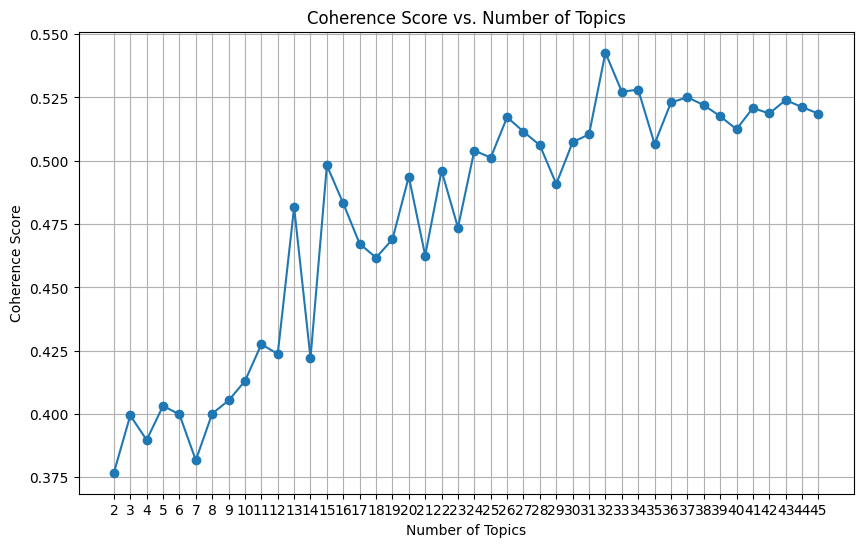

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(coherence_df["Num Topics"], coherence_df["Coherence Score"], marker='o')
plt.title("Coherence Score vs. Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.xticks(range(2, max_topics + 1))
plt.grid()
plt.show()

In [86]:
nmf_model = NMF(n_components=best_num_topics, random_state=42)
W = nmf_model.fit_transform(tfidf_matrix)
H = nmf_model.components_

def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

feature_names = tfidf_vectorizer.get_feature_names_out()
print("\nTop words for each topic:")
display_topics(nmf_model, feature_names)


Top words for each topic:
Topic 1: death, flower, mother, child, thou, thornbush, cold, woman, wilt, lake
Topic 2: king, shirt, faithful, swan, queen, brother, fawn, stepmother, child, forest
Topic 3: princess, real, pea, lady, mattress, prince, bed, feather, kiss, rain
Topic 4: thumb, coin, cow, tailor, sausage, fellow, hen, sentinel, robber, father
Topic 5: snowwhite, dwarf, bear, child, beard, big, sack, mother, wood, catch
Topic 6: pewter, boy, soldier, house, man, lonely, drawer, carve, delightful, picture
Topic 7: shoe, red, dance, church, lady, foot, look, angel, soldier, thou
Topic 8: wolf, grandmother, meat, bed, flower, door, cap, look, cottage, cart
Topic 9: cold, grandmother, wall, bundle, light, warm, goose, burn, girl, slipper
Topic 10: grasshopper, jump, high, chirp, understanding, assert, opinion, king, princess, family
Topic 11: tree, mouse, story, branch, tale, grow, boy, fairy, large, winter
Topic 12: emperor, office, suit, cloth, clothe, new, stuff, color, court, w

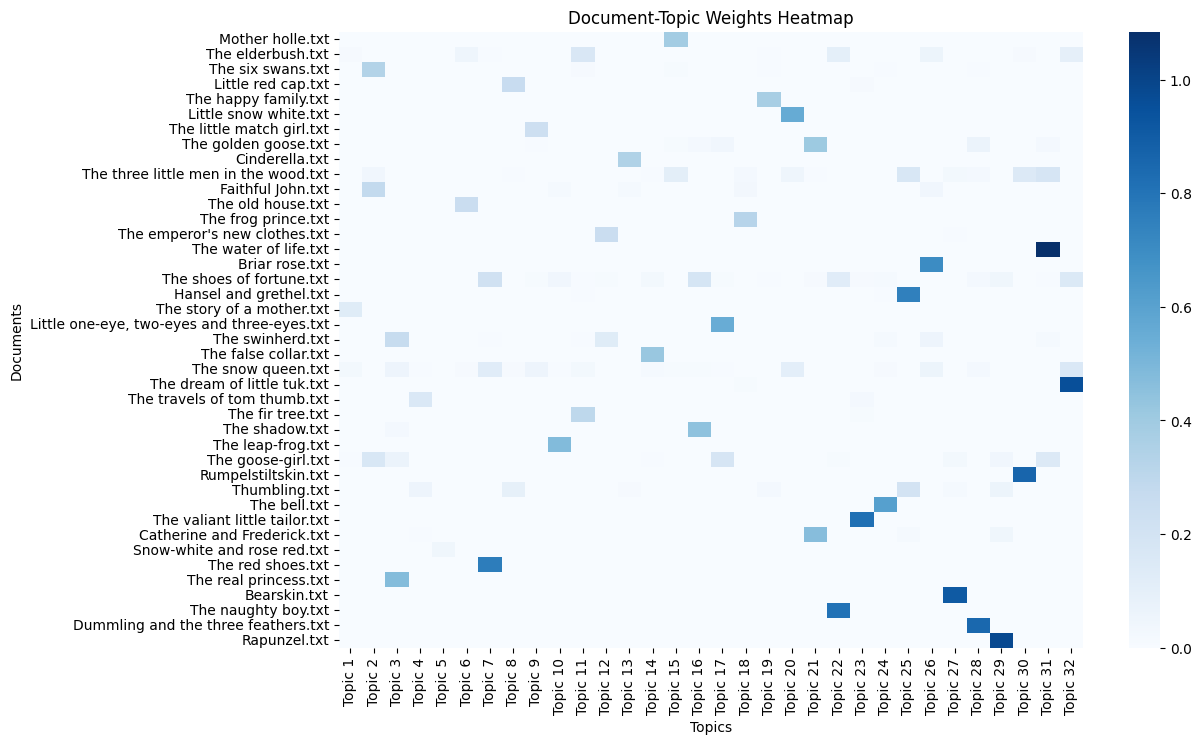

In [106]:
# Heatmap
def plot_document_topic_weights(W, titles):
    plt.figure(figsize=(12, 8))
    sns.heatmap(W, annot=False, cmap="Blues", cbar=True, xticklabels=[f"Topic {i+1}" for i in range(W.shape[1])], yticklabels=titles)
    plt.title("Document-Topic Weights Heatmap")
    plt.xlabel("Topics")
    plt.ylabel("Documents")
    plt.show()

plot_document_topic_weights(W, titles)

In [107]:
document_topics = pd.DataFrame(W, columns=[f"Topic {i+1}" for i in range(W.shape[1])])
document_topics["Title"] = titles  # Add document titles as a column

# Save 
output_file = "document_topic_weights.csv"
document_topics.to_csv(output_file, index=False)
print(f"Document-topic weights saved to '{output_file}'.")

Document-topic weights saved to 'document_topic_weights.csv'.


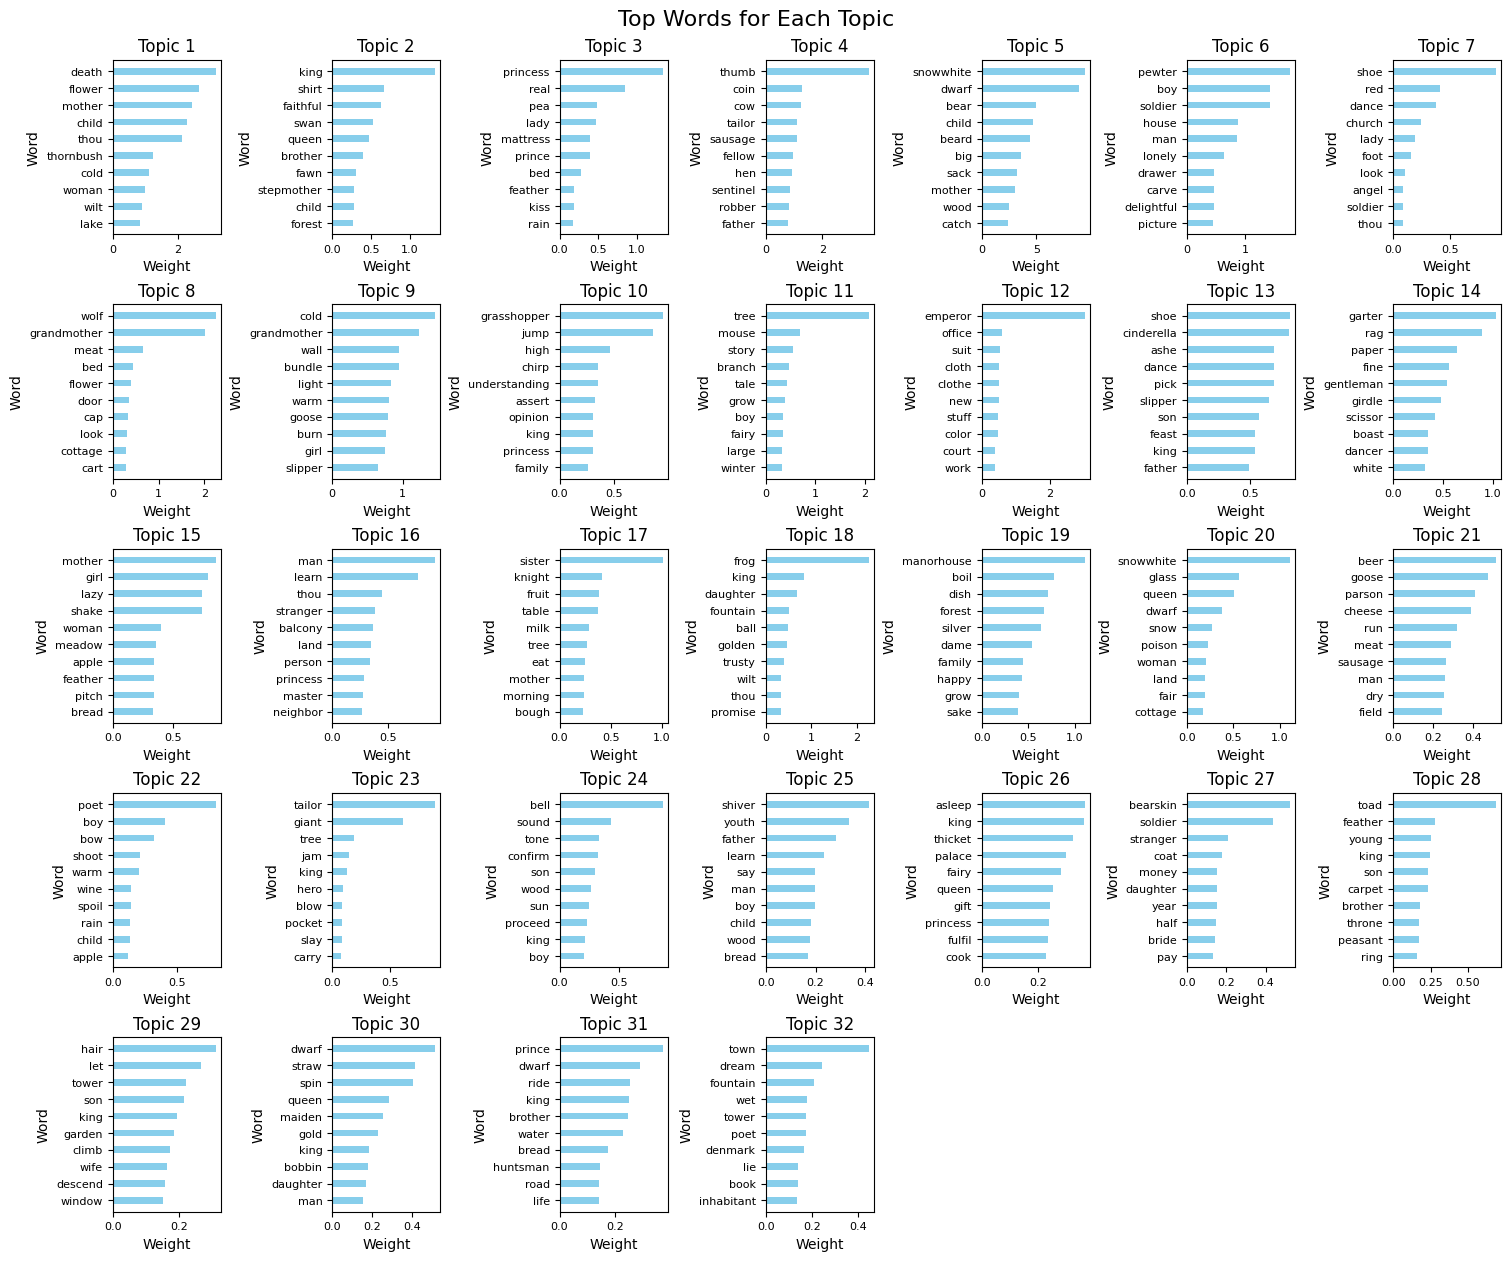

In [ ]:
#combined figures
def plot_all_topics_in_one(H, feature_names, no_top_words=10):
    n_topics = H.shape[0]  
    cols = 7  
    rows = (n_topics + cols - 1) // cols  
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 2.5 * rows), constrained_layout=True)
    axes = axes.flatten()  
    
    for topic_idx, topic in enumerate(H):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        weights = topic[topic.argsort()[:-no_top_words - 1:-1]]
        
        ax = axes[topic_idx]
        bar_height = 0.4  
        ax.barh(top_words, weights, color="skyblue", height=bar_height)
        ax.set_title(f"Topic {topic_idx + 1}", fontsize=12)
        ax.set_xlabel("Weight", fontsize=10)
        ax.set_ylabel("Word", fontsize=10)
        ax.tick_params(axis='both', labelsize=8) 
        ax.invert_yaxis()
    
    for i in range(len(H), len(axes)):
        fig.delaxes(axes[i])
    
    plt.suptitle("Top Words for Each Topic", fontsize=16)
    plt.savefig("top_words_per_topic.png", dpi=300, bbox_inches='tight') 
    plt.show()

plot_all_topics_in_one(H, feature_names)


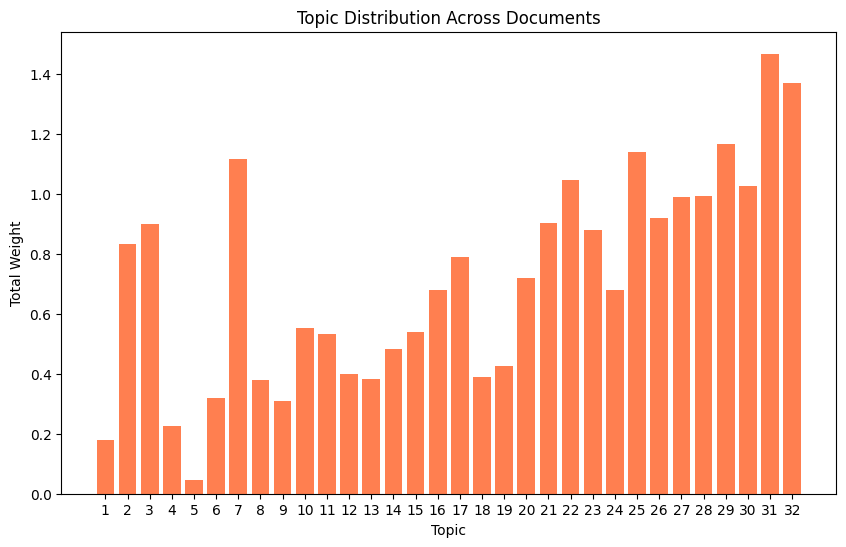

In [96]:
# Distribution
def plot_topic_distribution(W):
    topic_sums = W.sum(axis=0)
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(topic_sums) + 1), topic_sums, color="coral")
    plt.title("Topic Distribution Across Documents")
    plt.xlabel("Topic")
    plt.ylabel("Total Weight")
    plt.xticks(range(1, len(topic_sums) + 1))
    plt.show()

plot_topic_distribution(W)